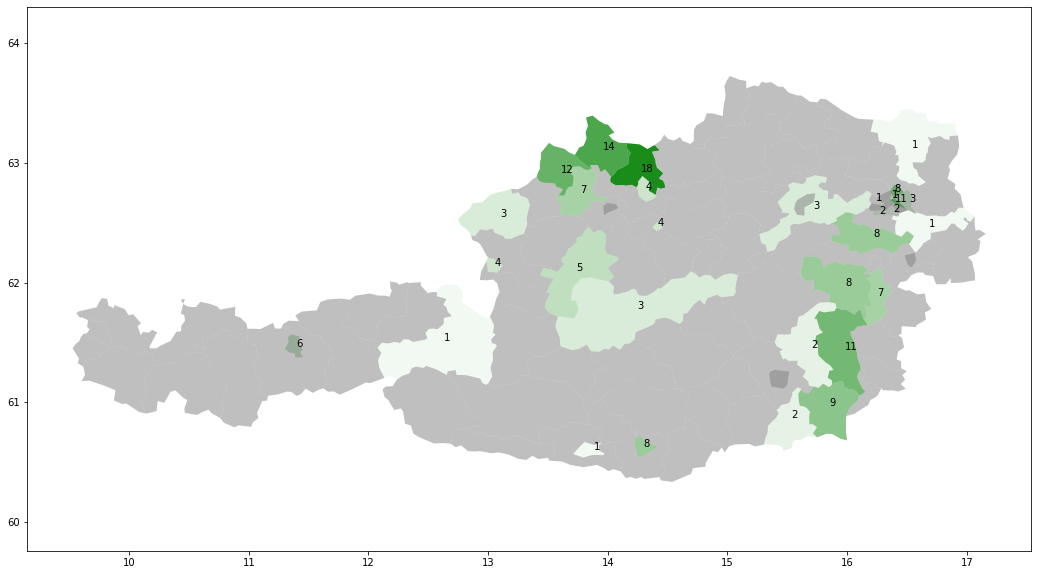

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
s_bricks = [201,202,303,304,313,315,316,320,321,401,402,404,407,408,413,414,416,501,506,602,610,612,617,622,623,701,902,910,914,920,921,922,923]
#          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
s_sales = [8,1,8,1,1,8,3,7,1,4, 4, 3, 5, 7, 14,12,18, 4, 1, 8, 2, 3, 2,11, 9, 6,11, 2, 1, 1, 8, 3, 2]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'C:\Users\User\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/20)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

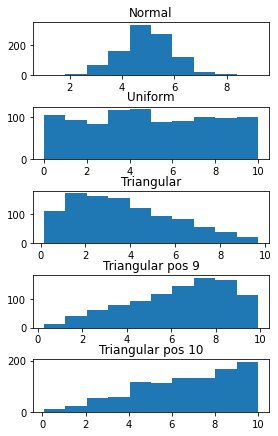

Distr   NPS,  CSAT
-------------------
normal -0.45, 2.50
uniform -0.12, 2.26
triangular neg -0.23, 1.84
triangular pos -0.02, 3.18
triangular pos 0.08, 3.33


In [2]:
# NPS sensitivity test
import random
import matplotlib.pyplot as plt
import numpy as np
import math

def nps(survey):
    '''NPS = %promotors(9 or 10) - %detractors(<=6), survey is a list of scores 0 to 10'''
    promotors = sum([s for s in survey if s > 8])
    detractors = sum([s for s in survey if s < 7])
    return (promotors - detractors) / len(survey)

def csat(survey):
    '''customer satisfaction from a 0-10 rating'''
    return sum(survey) / len(survey) / 2
  
Y1 = np.random.normal(5, 1, 1000)
#Y2 = np.random.multinomial(10, [0.2, 0.8], 1000)
Y3 = np.random.uniform(0, 10, 1000)
Y4 = np.random.triangular(0, 1, 10, 1000)
Y5 = np.random.triangular(0, 9, 10, 1000)
Y6 = np.random.triangular(0, 10, 10, 1000)

figure, axis = plt.subplots(5, 1, figsize=(4, 6))
figure.tight_layout()
  
# For Normal Function
axis[0].hist(Y1)
axis[0].set_title("Normal")
  
# For Uniform Function
axis[1].hist(Y3)
axis[1].set_title("Uniform")
  
# For Triangular Function - neg tilted
axis[2].hist(Y4)
axis[2].set_title("Triangular")

# For Triangular Function - pos tilted
axis[3].hist(Y5)
axis[3].set_title("Triangular pos 9")

# For Triangular Function - pos tilted
axis[4].hist(Y6)
axis[4].set_title("Triangular pos 10")

plt.show()

print(f"Distr   NPS,  CSAT")
print("-------------------")
npsa = 0
csata = 0
for i in range(1000):
    Y1 = np.random.normal(5, 1, 10)
    s = [int(round(n)) for n in Y1]
    npsa += nps(s)
    csata += csat(s)
print(f"normal {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y3 = np.random.uniform(0, 10, 10)
    s = [int(n) for n in Y3]
    npsa += nps(s)
    csata += csat(s)
print(f"uniform {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y4 = np.random.triangular(0, 1, 10, 10)
    s = [int(round(n)) for n in Y4]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular neg {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y5 = np.random.triangular(0, 9, 10, 10)
    s = [int(round(n)) for n in Y5]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular pos {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")
npsa = 0
csata = 0
for i in range(1000):
    Y6 = np.random.triangular(0, 10, 10, 10)
    s = [int(round(n)) for n in Y6]
    npsa += nps(s)
    csata += csat(s)
print(f"triangular pos {npsa / 10000 :3.2f}, {csata / 1000 :3.2f}")

In [2]:


def fact(n):
    res = 1
    for k in range(n):
        res *= (k+1)
    return res

print([fact(n+1) - fact(n) for n in range(10)])
print([fact(n)*n for n in range(10)])

[0, 1, 4, 18, 96, 600, 4320, 35280, 322560, 3265920]
[0, 1, 4, 18, 96, 600, 4320, 35280, 322560, 3265920]


In [19]:
import math

lp0 = [k%12 for k in range(12)]
lp0.sort()
print(f"original group: {lp0}")

for d in range(12):
    if math.gcd(12,d+1) > 1:
        lp = [((d+1)*k)%12 for k in range(12)]
        lp.sort()
        #print(set(lp))
        lp0 = [l for l in lp0 if l not in lp]
        
print(f"after removing all subgroups generated by factors: {lp0}")

original group: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
after removing all subgroups generated by factors: [1, 5, 7, 11]


In [2]:
# Rakki maths II
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

for i in range(6):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(0):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")

863 : 62 = 13, R 57
418 : 34 = 12, R 10
744 : 65 = 11, R 29
174 : 63 = 2, R 48
332 : 32 = 10, R 12
508 : 28 = 18, R 4


In [22]:
# Secretary problem = optimal stopping
# x -> (r-1)/n   t -> (i-1)/n
# P(x) = -xlnx
import math

x = (5-1)/10
-x * math.log(x)

0.366516292749662

In [1]:
# Python3 Program to test 1/e law for
# Secretary Problem
import random
import math
   
e = 2.71828;
   
# To find closest integer of num.
def roundNo(num):
    if(num < 0):
        return (num - 0.5)
    else:
        return (num + 0.5);
   
# Finds best candidate using n/e rule.
# candidate[] represents talents of n candidates.
def printBestCandidate(candidate, n):
       
    # Calculating sample size for benchmarking.
    sample_size = roundNo(n / e);
    print("\n\nSample size is",
           math.floor(sample_size));
   
    # Finding best candidate in sample size
    best = 0;
    for i in range(1, int(sample_size)):
        if (candidate[i] > candidate[best]):
            best = i;
   
    # Finding the first best candidate that
    # is better than benchmark set.
    for i in range(int(sample_size), n):
        if (candidate[i] >= candidate[best]):
            best = i;
            break;
   
    if (best >= int(sample_size)):
        print("\nBest candidate found is",
                     math.floor(best + 1),
              "with talent", math.floor(candidate[best]));
    else:
        print("Couldn't find a best candidate");
   
# Driver code
n = 8;
   
# n = 8 candidates and candidate
# array contains talents of n
# candidate where the largest
# number means highest talented
# candidate.
candidate = [0] * (n);
   
# generating random numbers between 1 to 8
# for talent of candidate
for i in range(n):
    candidate[i] = 1 + random.randint(1, 8);
print("Candidate : ", end = "");
   
for i in range(n):
    print((i + 1), end = " ");
print("\nTalents : ", end = "");
   
for i in range(n):
    print(candidate[i], end = " ");
    
printBestCandidate(candidate, n);
   
# This code is contributed by mits

Candidate : 1 2 3 4 5 6 7 8 
Talents : 3 2 7 5 7 7 7 3 

Sample size is 3

Best candidate found is 5 with talent 7


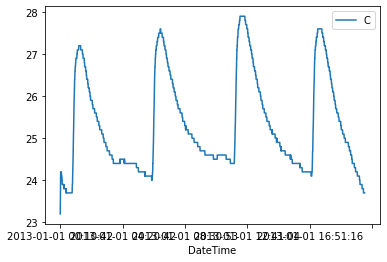

[ 155  803 1460 2080]
[27.2, 27.6, 27.9, 27.6]


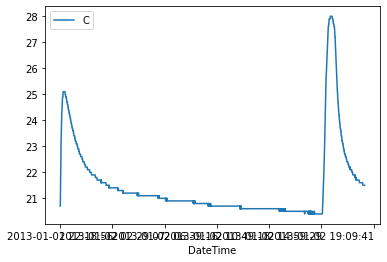

[  36 2594]
[25.1, 28.0]


In [4]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220809_070516.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(26, 29), distance = 150)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

df = pandas.read_csv(r'UNT330A_20220810_091139.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(23, 29), distance = 150)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])


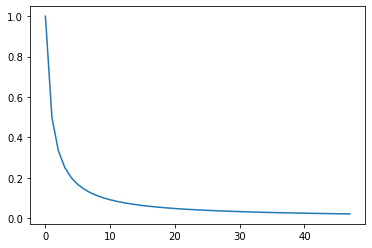

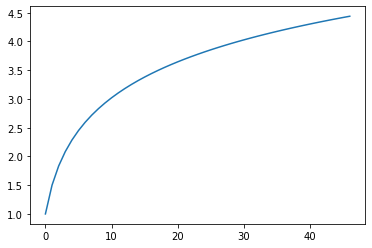

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([1/(i-1) for i in range(2, 50)])
plt.show()

plt.plot([sum([1/(i-1) for i in range(2, n)]) for n in range(3,50)])
plt.show()

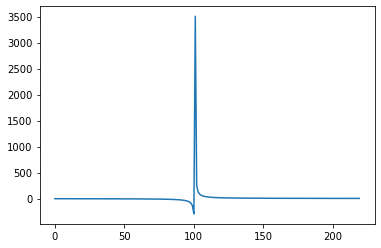

In [23]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.1  # 0.12 to 0.23
a = 0.0008  # 0.000167 to 0.000805
t0 = 29
t1 = 22

def f(tc):
    return t0*(1-np.exp(-a*tc))-t1

plt.plot([f(tc)**2/(tc + f(tc)/k) for tc in range(80, 300)])
plt.show()

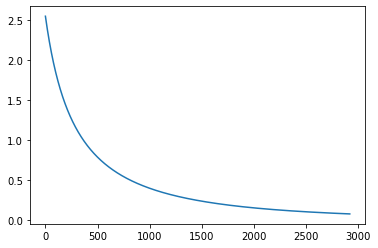

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.13  # 0.149 to 0.23
a = 0.0002  # 0.000167 to 0.000385
t0 = 27.6
t1 = 24

def fc(tc):
    return t0*np.exp(-a*tc)

plt.plot([fc(tc)**2/(tc + fc(tc)/k) for tc in range(80, 3000)])
plt.show()

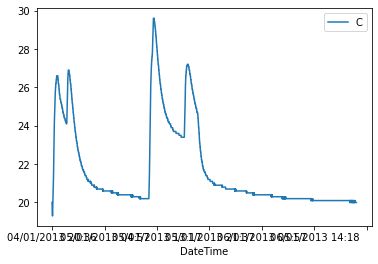

[  99  316 1938 2585]
[26.6, 26.9, 29.6, 27.2]


In [6]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220818_111727.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(24, 30), distance = 100)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

In [2]:
import math

t0 = 27.2
t1 = 20.0
dt = 1608

(math.log(t0) - math.log(t1)) / dt

0.000191221828201468

In [1]:
import math

def Hn(x):
    return (1/(1-x)*math.log(1/(1-x)))

[Hn(x/11) for x in range(10)]

[0.0,
 0.10484119778475744,
 0.2452641833426293,
 0.4378738802879851,
 0.7102623373105185,
 1.1112489732122453,
 1.7346061928013938,
 2.7819025071158197,
 4.764037608477624,
 9.376114507311343]

In [4]:
[(1-2*x)/(1-3*x+x*x) for x in range(10)]

[1.0,
 1.0,
 3.0,
 -5.0,
 -1.4,
 -0.8181818181818182,
 -0.5789473684210527,
 -0.4482758620689655,
 -0.36585365853658536,
 -0.3090909090909091]

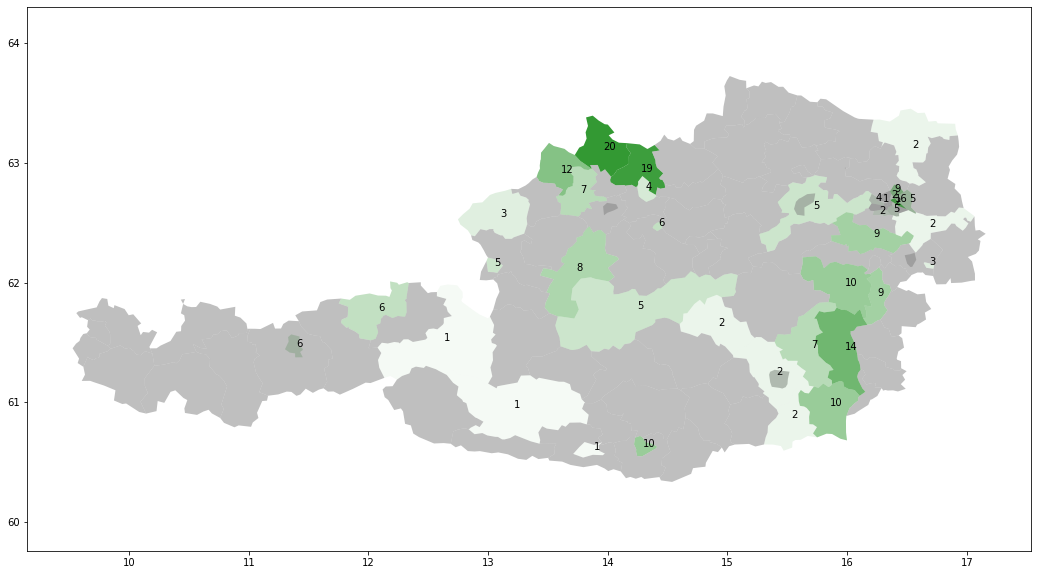

In [5]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
s_bricks = [102,201,202,206,303,304,313,315,316,320,321,401,402,404,407,408,413,414,416,501,506,602,606,610,611,612,617,622,623,624,625,701,705,902,903,910,914,916,920,921,922,923]
#          1 2  3 4 5 6 7 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
s_sales = [3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'C:\Users\User\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/25)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

In [15]:


def is_legal_str(s):
    nr = 0
    nl = 0
    for i in range(len(s)):
        if s[i] == '(':
            nl += 1
        elif s[i] == ')':
            nr += 1
    if nr == nl:
        return True
    return False

def min_legal_str(s):
    nr = 0
    nl = 0
    i = 0
    while i < len(s):
        if s[i] == '(':
            nl += 1
        elif s[i] == ')':
            nr += 1
        if nr == nl:
            return (i+1)/2
        i += 1
    return (i+1)/2

min_legal_str('(())())')

2.0

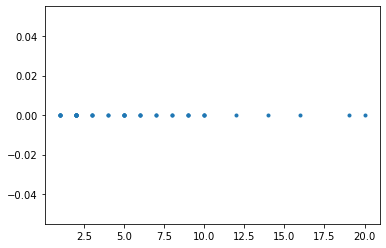

In [4]:
import numpy as np
import matplotlib.pyplot as pp

val = 0. # this is the value where you want the data to appear on the y-axis.
s_sales = np.array([3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2])

pp.plot(s_sales, np.zeros_like(s_sales) + val, '.')
pp.show()

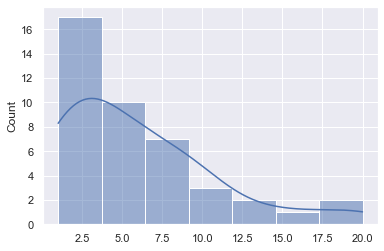

In [7]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")
#df = sns.load_dataset("iris")
s_sales = np.array([3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2])

#sns.histplot(data=s_sales, x="sepal_length", kde=True)
sns.histplot(data=s_sales, kde=True)
plt.show()

In [20]:
import math

sum([1/math.factorial(n) for n in range(0,100)])

2.7182818284590455

In [17]:
'''
Sci-Hub Downloader
----
Description:
This script takes input URL/DOI and tries
to download the paper from Sci-Hub.
Version : 2.1
Date    : 16th July, 2018
Author  : Gadila Shashank Reddy
'''
from __future__ import print_function
import argparse
import os
import platform
import re
import time
import webbrowser as wbb

# Python 2.x incompatibility
if int(platform.python_version_tuple()[0]) < 3:
    print("This script is NOT compatible with Python 2.x")
    print("Use this command to run the script:\n")
    print("python3 sci_hub.py\n")
    quit()

# Warning for any platform other than *NIX
if platform.system() not in ['Linux', 'Darwin']:
    print("\nYOU HAVE BEEN WARNED")
    print("Looks like you are not running on GNU/Linux or a Mac")
    print("This program is not guarenteed to work on Windows\n")

from bs4 import BeautifulSoup as bs  # noqa: E402
import requests  # noqa: E402

# Define command line arguments
parser = argparse.ArgumentParser(description="Sci-Hub downloader: Utility to \
                                             download from Sci-Hub")
parser.add_argument("target",
                    help="URL/DOI to download PDF", type=str)
parser.add_argument("--view", help="Open article in browser for reading",
                    action="store_true")
args = parser.parse_args()

# Get Sci-Hub URL from Google
def get_url():
    print("Trying primary method.")
    # Use where is sci hub now api service
    response = requests.get("https://whereisscihub.now.sh/api")
    return response.json()

# Alterane URL from Twitter
def try_alternate():
    print("Trying alternate method.")
    # Query twitter page of Sci-Hub
    # and create soup object
    response = requests.get("https://twitter.com/Sci_Hub")
    soup = bs(response.content, "lxml")
    # Try to extract the URL present
    # in the side panel as alt_url
    for i in soup.find_all("a", attrs={"class": "u-textUserColor"}):
        # Regex check
        if re.match('[http://[s]?]?sci-hub.[a-z]{2,}', i.text.strip()):
            alt_url = i.text.strip()
            # Append transfer protocol
            # if not present
            if "://" not in alt_url:
                alt_url = "https://" + alt_url
            print("Alternate URL is: " + alt_url + "\n")
            return alt_url + "/"
        else:
            return ""


# Validate URL by checking title
def validate_url(url_list):
    for url in url_list:
        print("Validating {}".format(url))
        if url == "":
            print("URL not valid")
        # Send request to given url
        # and compare title tags
        response = requests.get(url)
        soup = bs(response.content, "lxml")
        if soup.title.text == "Sci-Hub: removing barriers in the way of science":
            print("{} validated\n".format(url))
            if url[-1] != "/":
                url += "/"
            return url

    return ""


# Extract DOI, Mirror
def get_links(target):
    # Get response of target page
    # from Sci-Hub and create soup object
    response = requests.get(target)
    soup = bs(response.content, "lxml")
    # Extract DOI
    try:
        mirror = soup.find("iframe", attrs={"id": "pdf"})['src'].split("#")[0]
        if mirror.startswith('//'):
            mirror = mirror[2:]
            mirror = 'https://' + mirror
    except Exception:
        print("Mirror not found")
        mirror = ""
    try:
        doi = soup.title.text.split("|")[2].strip()
    except Exception:
        print("DOI not found")
        doi = ""
    # Extract download link
    return doi, mirror


# Download paper
def download_paper(mirror, args):
    # Response from mirror link
    print("Sending request")
    response = requests.get(mirror)
    print("Response received. Analyzing...\n")
    # If header states PDF then write
    # content to file
    if args.view:
        print("Firing up your browser...")
        wbb.open_new(mirror)
        quit()
    elif response.headers['content-type'] == "application/pdf":
        size = round(int(response.headers['Content-Length'])/1000000, 2)
        print("Downloaded {} MB\n".format(size))
        with open("./Downloads/wuieobgefn.pdf", "wb") as f:
            f.write(response.content)
        f.close()
    # Check if firefox exists and open download link
    # in firefox
    elif re.match("text/html", response.headers['content-type']):
        print("Looks like captcha encountered.")
        print("Download link is \n" + mirror + "\n")
        time.sleep(2)
        wbb.open_new(mirror)
        quit()


# Rename and move
def move_file(doi, args):
    if doi:
        name = doi.replace("/", "_") + ".pdf"
        if os.path.exists("./Downloads/wuieobgefn.pdf"):
            os.rename("./Downloads/wuieobgefn.pdf", "./Downloads/" + name)
            print("Files saved at ./Downloads/" + name)
    else:
        print("Files saved at ./Downloads/wuieobgefn.pdf")


# Main function
def main():
    sci_hub = validate_url(get_url())
    if not sci_hub:
        sci_hub = validate_url(try_alternate())
        if not sci_hub:
            print("Sci-Hub mirror not found")
            print("Try after some time")
            quit()
    else:
        url = sci_hub + args.target
        print("Extracting download links...")
        doi, mirror = get_links(url)
        if not mirror:
            print("Download link not available")
            print("Please try after sometime")
            print("\nAlso try prepending ' http://dx.doi.org/' to input")
            print("If it still doesn't work raise an issue at " +
                  "https://github.com/gadilashashank/Sci-Hub/issues")
            time.sleep(10)
            quit()
        else:
            print("Downloading paper...")
            download_paper(mirror, args)
            move_file(doi, args)


main()
print("\nThanks for using.\n")
quit()


YOU HAVE BEEN WARNED
Looks like you are not running on GNU/Linux or a Mac
This program is not guarenteed to work on Windows



usage: ipykernel_launcher.py [-h] [--view] target
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\User\anaconda3\envs\tfgpu\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
sum([1/(n*n) for n in range(1,1000)])

1.6439335666815615

In [1]:

def series(n):
    an1 = 1
    res = []
    for i in range(n):
        an1 = 2*an1 + i
        res.append(an1)
    return res

print(series(10))
print([2**(n+1)-n-1 for n in range(1,11)])

[2, 5, 12, 27, 58, 121, 248, 503, 1014, 2037]
[2, 5, 12, 27, 58, 121, 248, 503, 1014, 2037]


In [4]:
[1/((1-x)*(1-2*x)) for x in range(2,10)]

[0.3333333333333333,
 0.1,
 0.047619047619047616,
 0.027777777777777776,
 0.01818181818181818,
 0.01282051282051282,
 0.009523809523809525,
 0.007352941176470588]